# Cracked Stress Analysis - Rectangular Section

## Import modules

In [1]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinearNoTension,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection

## Create materials

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinearNoTension(
        elastic_modulus=30e3,
        ultimate_strain=0.003,
        compressive_strength=40,
    ),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=900e3,
)

## Create geometry

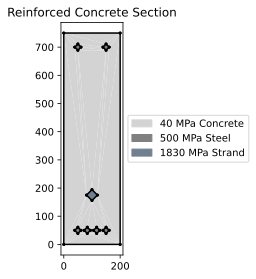

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = rectangular_section(d=750, b=200, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=2, x_s=100, anchor=(50, 700)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=4, x_s=100 / 3, anchor=(50, 50)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=750,
    material=strand,
    x=100,
    y=750 - 575,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

## Moment Curvature Analysis

In [4]:
mk_res = conc_sec.moment_curvature_analysis()

eps0=1.843e-04; kappa0=0.000e+00; n_i=4.883e-03; m_i=1.702e+08
eps0=-2.349e-04; kappa0=-1.000e-06; n_i=1.231e-03; m_i=-2.221e+07
eps0=-1.788e-04; kappa0=-8.846e-07; n_i=3.375e-03; m_i=-1.035e+07
eps0=-1.547e-04; kappa0=-8.339e-07; n_i=5.017e-04; m_i=-4.573e+06


Output()

eps0=-1.360e-04; kappa0=-7.937e-07; n_i=3.870e-03; m_i=3.017e+05
      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: -7.962198634579087e-07


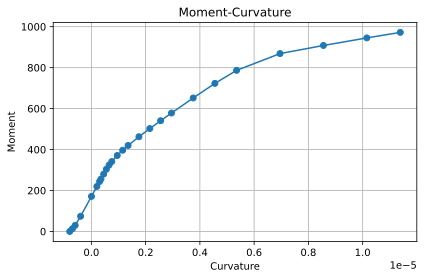

<AxesSubplot: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [6]:
mk_res.plot_results()